In [52]:
# Importing Libraries
import pandas as pd
import numpy as np
# import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


# **Import Dataset**

In [53]:
ad_dataset = pd.read_csv('advertising.csv')
ad_dataset.head(5)

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Category,City,Male,Province,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


# **Data Exploration**

In [54]:
ad_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DailyTimeSpentonSite  1000 non-null   float64
 1   Age                   1000 non-null   int64  
 2   AreaIncome            1000 non-null   float64
 3   DailyInternetUsage    1000 non-null   float64
 4   Category              1000 non-null   object 
 5   City                  1000 non-null   object 
 6   Male                  1000 non-null   int64  
 7   Province              1000 non-null   object 
 8   Timestamp             1000 non-null   object 
 9   Clicked on Ad         1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [55]:
# To check number of rows(0) and coloumns(1) 
ad_dataset.shape

(1000, 10)

In [56]:
# Dataset overview which includes statistical values
ad_dataset.describe()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## **About The Dataset**

**Overview:**
- Dataset contains 1000 rows, 10 features and 1 **Unnamed: 0** column which is the ID column.
- Dataset consists of 3 data types; float64, int64 and object.
- **Timestamp** feature could be changed into datetime data type.
- Dataset contains null values in various columns.

**Description:**
- **Unnamed: 0** =	ID of Customers
- **Daily Time Spent on Site** =	Time spent by the user on a site in minutes
- **Age** =	Customer's age in terms of years
- **Area Income** =	Average income of geographical area of consumer
- **Daily Internet Usage** =	Average minutes in a day consumer is on the internet
- **Male** =	Gender of the customer
- **Timestamp** =	Time at which user clicked on an Ad or the closed window
- **Clicked on Ad** =	Whether or not the customer clicked on an Ad	(Target Variable)
- **city** =	City of the consumer
- **province** =	Province of the consumer
- **category** =	Category of the advertisement

## **Data Visualisation**

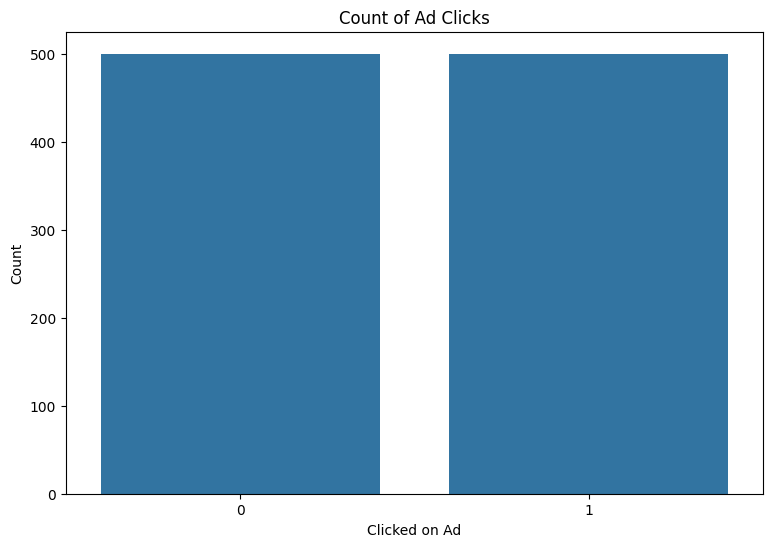

In [57]:
# Bar graph (count plot) for categorical variable

plt.figure(figsize=(9, 6))
sns.countplot(x="Clicked on Ad", data=ad_dataset)
plt.title("Count of Ad Clicks")
plt.xlabel("Clicked on Ad")
plt.ylabel("Count")
plt.show()

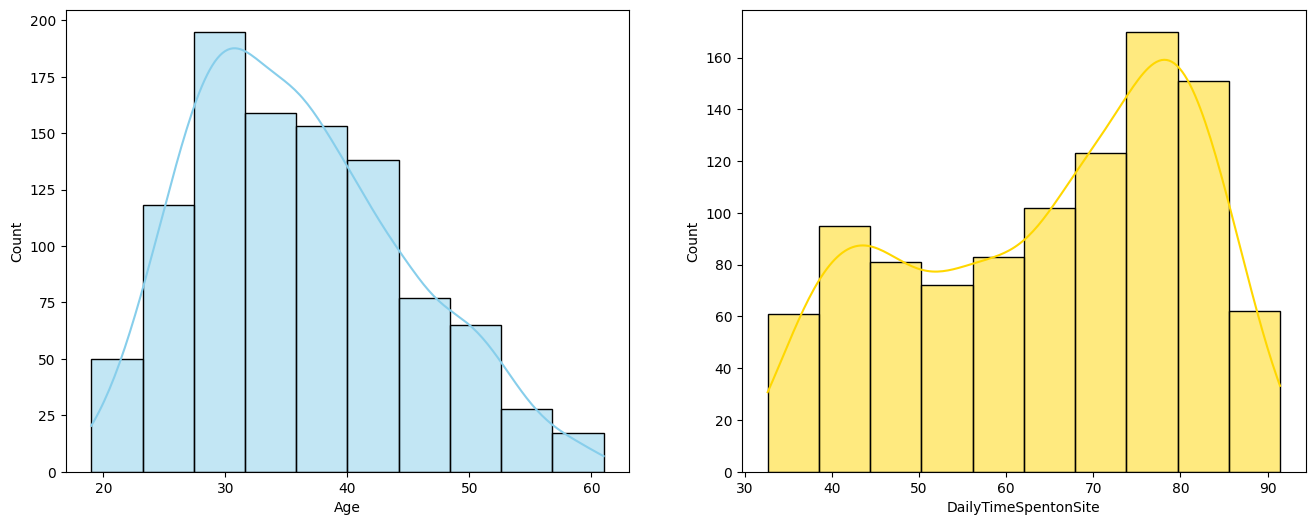

In [58]:
# Histogram and Density Graphs of all Variables were accessed.

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(ad_dataset.Age, bins=10, kde=True, color='skyblue', ax=ax[0])

sns.histplot(ad_dataset.DailyTimeSpentonSite, bins=10, kde=True, color='gold', ax=ax[1])

plt.show()

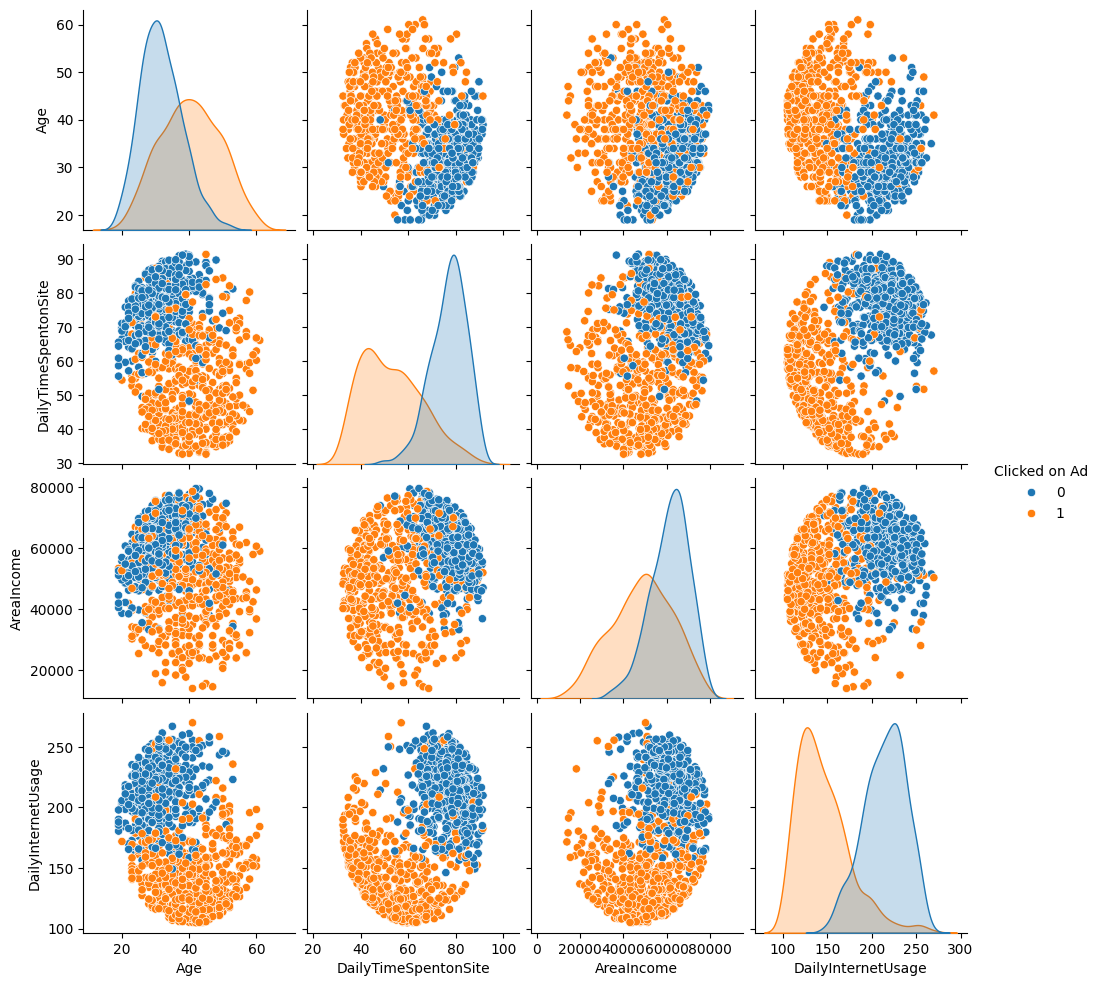

In [59]:
# Pair plot for numerical variables
sns.pairplot(ad_dataset[['Age', 'DailyTimeSpentonSite', 'AreaIncome', 'DailyInternetUsage', 'Clicked on Ad']],
             hue='Clicked on Ad', diag_kind='kde')
plt.show()

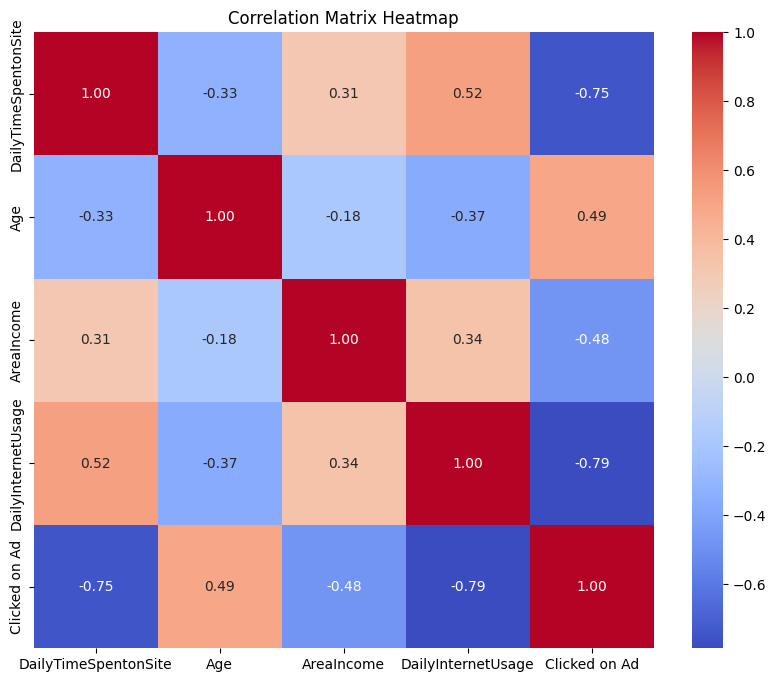

In [60]:
# Selecting numerical features and the target variable
numerical_features = ['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage']
target_variable = 'Clicked on Ad'

# Calculate the correlation matrix
correlation_matrix = ad_dataset[numerical_features + [target_variable]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()